# Import Libraries

In [1]:
import pandas  as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

# Connect To postgres

In [2]:
# DEFINE THE DATABASE CREDENTIALS
user = 'postgres'
password = '****'
host = 'localhost'
port =5432
database = 'Northdb1'
engine=create_engine(url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        ))

In [3]:
#cofirm my database server
try:
        # GET THE CONNECTION OBJECT (ENGINE) FOR THE DATABASE
    engine=engine
    print(
        f"Connection to the {host} for user {user} created successfully.")
except Exception as ex:
        print("Connection could not be made due to the following error: \n", ex)

Connection to the localhost for user postgres created successfully.


# Extract Table

data for customer and order ships company

In [4]:

df= pd.read_sql("""SELECT *  
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
                    
                     """, engine)
                      

In [5]:
df.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,...,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,None,51100,France,26.47.15.10,26.47.15.11
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,None,44087,Germany,0251-031259,0251-035695
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",...,Hanari Carnes,Mario Pontes,Accounting Manager,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,(21) 555-8765
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",...,Victuailles en stock,Mary Saveley,Sales Agent,"2, rue du Commerce",Lyon,None,69004,France,78.32.54.86,78.32.54.87
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",...,Suprêmes délices,Pascale Cartrain,Accounting Manager,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,(071) 23 67 22 20,(071) 23 67 22 21


In [6]:
df_cust= pd.read_sql("""SELECT o.customer_id,avg(freight)
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
            group by  o.customer_id 
            
                     """, engine)

In [7]:
df_cust

,customer_id,avg
0,TOMSP,20.995000
1,LONEP,9.982500
2,OLDWO,98.353000
3,WARTH,54.832000
4,MAGAA,46.975000
...,...,...
84,LILAS,52.457857
85,WHITC,96.647143
86,RICSU,100.128999
87,TRAIH,23.336666


# Know maxium company freight 

In [8]:
company_max_freight= pd.read_sql("""SELECT c.company_name,max(freight)
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
            group by  c.company_name
            order by max desc
            
                     """, engine)

In [9]:
company_max_freight

,company_name,max
0,QUICK-Stop,1007.64
1,Queen Cozinha,890.78
2,Save-a-lot Markets,830.75
3,Ernst Handel,789.95
4,Great Lakes Food Market,719.78
...,...,...
84,Lonesome Pine Restaurant,26.31
85,Galería del gastrónomo,18.69
86,Lazy K Kountry Store,11.92
87,Laughing Bacchus Wine Cellars,4.65


# average freight for ecah region

In [10]:
region_avg_freight= pd.read_sql("""SELECT c.region,avg(freight)
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
            group by  c.region
            order by avg desc
            
                     """, engine)

In [11]:
region_avg_freight

,region,avg
0,ID,215.603227
1,Co. Cork,145.012629
2,NM,118.567222
3,Québec,107.247692
4,AK,98.353000
5,WA,75.919474
6,None,73.536635
7,Táchira,69.953334
8,SP,65.202450
9,WY,62.074443


# Know disticnt company name 

In [12]:
distinct_company= pd.read_sql("""SELECT distinct(company_name)
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
     
                     """, engine)

In [13]:
distinct_company

,company_name
0,Wilman Kala
1,Magazzini Alimentari Riuniti
2,The Cracker Box
3,Wellington Importadora
4,Let's Stop N Shop
...,...
84,Romero y tomillo
85,White Clover Markets
86,Piccolo und mehr
87,Island Trading


# Retrive all ship_name strat with V

In [14]:
company_Start_V= pd.read_sql("""SELECT ship_name
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
            where ship_name like 'V%%'
     
                     """, engine)

In [15]:
company_Start_V

,ship_name
0,Vins et alcools Chevalier
1,Victuailles en stock
2,Vins et alcools Chevalier
3,Vins et alcools Chevalier
4,Victuailles en stock
5,Vaffeljernet
6,Vaffeljernet
7,Victuailles en stock
8,Victuailles en stock
9,Vaffeljernet


# Convert object data to date

In [16]:
df['order_date']=pd.to_datetime(df['order_date'])
df['required_date']=pd.to_datetime(df['required_date'])
df['shipped_date']=pd.to_datetime(df['shipped_date'])

In [17]:
df['order_date'].value_counts()

1998-02-26    6
1998-05-06    4
1998-04-27    4
1998-03-24    4
1998-04-17    4
             ..
1997-02-24    1
1997-02-20    1
1997-02-18    1
1997-02-17    1
1997-06-05    1
Name: order_date, Length: 480, dtype: int64

# show ship_name that order date in april 1998

In [18]:
ship_april= pd.read_sql("""SELECT ship_name,order_date
            from public.orders o
            inner join customers c
            on o.customer_id=c.customer_id
            where   order_date >'1998-03-31' and order_date <'1998-05-1'
     
                     """, engine)

In [19]:
ship_april

,ship_name,order_date
0,Ernst Handel,1998-04-01
1,QUICK-Stop,1998-04-01
2,The Big Cheese,1998-04-01
3,Folk och fä HB,1998-04-01
4,Vaffeljernet,1998-04-02
...,...,...
69,Ricardo Adocicados,1998-04-29
70,Franchi S.p.A.,1998-04-30
71,Great Lakes Food Market,1998-04-30
72,Reggiani Caseifici,1998-04-30


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      809 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_region       323 non-null    object        
 12  ship_postal_code  811 non-null    object        
 13  ship_country      830 non-null    object        
 14  customer_id       830 non-

In [21]:
df_file= pd.read_sql("""SELECT *
            from public.orders o
            inner join customers c 
            on o.customer_id=c.customer_id
           
     
                     """, engine)

In [22]:
df_file.to_csv('customer.csv')

In [23]:
dff=pd.read_csv('customer.csv' ,index_col=False)
dff.head()

,Unnamed: 0,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,...,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
0,0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,...,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,NaN,51100,France,26.47.15.10,26.47.15.11
1,1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,...,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,NaN,44087,Germany,0251-031259,0251-035695
2,2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,...,Hanari Carnes,Mario Pontes,Accounting Manager,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,(21) 555-8765
3,3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,...,Victuailles en stock,Mary Saveley,Sales Agent,"2, rue du Commerce",Lyon,NaN,69004,France,78.32.54.86,78.32.54.87
4,4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,...,Suprêmes délices,Pascale Cartrain,Accounting Manager,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium,(071) 23 67 22 20,(071) 23 67 22 21


# EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      809 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_region       323 non-null    object        
 12  ship_postal_code  811 non-null    object        
 13  ship_country      830 non-null    object        
 14  customer_id       830 non-

There are missing values on fax , region,ship_region

In [25]:
#know some statistics on numerical values
df.describe()

,order_id,employee_id,ship_via,freight
count,830.000000,830.000000,830.000000,830.000000
mean,10662.500000,4.403614,2.007229,78.244205
std,239.744656,2.499648,0.779685,116.779294
min,10248.000000,1.000000,1.000000,0.020000
25%,10455.250000,2.000000,1.000000,13.380000
50%,10662.500000,4.000000,2.000000,41.360000
75%,10869.750000,7.000000,3.000000,91.430000
max,11077.000000,9.000000,3.000000,1007.640000


<AxesSubplot:>

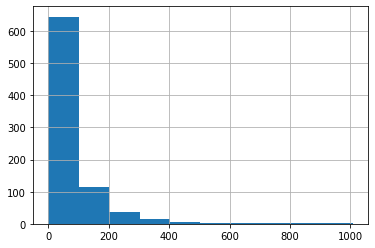

In [26]:
df['freight'].hist()

In [27]:
df_ship=df['ship_name'].value_counts().reset_index()[:10]
df_ship=df_ship.rename(columns={'index':'ship_name','ship_name':'count'})
df_ship

,ship_name,count
0,Save-a-lot Markets,31
1,Ernst Handel,30
2,QUICK-Stop,28
3,Hungry Owl All-Night Grocers,19
4,Folk och fä HB,19
5,HILARION-Abastos,18
6,Berglunds snabbköp,18
7,Rattlesnake Canyon Grocery,18
8,Bon app',17
9,Wartian Herkku,15


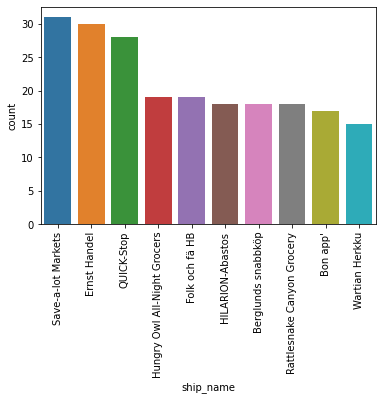

In [28]:
sns.barplot(x='ship_name',y='count',data=df_ship)
plt.xticks(rotation='vertical')
plt.show()